In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from darts.datasets import TemperatureDataset
sns.set_context('talk')

In [2]:
df = TemperatureDataset().load().pd_dataframe()

# 5년치 최저온도 데이터셋
df = df.loc[:'1985']
df

component,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1985-12-27,11.5
1985-12-28,10.8
1985-12-29,12.0


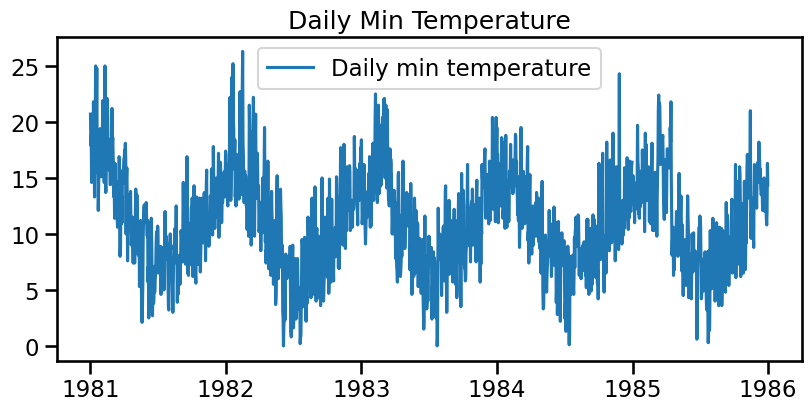

In [3]:
plt.style.use('default')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(8,4), constrained_layout=True)
ax.plot(df.index, df['Daily minimum temperatures'],label='Daily min temperature')
ax.set_title('Daily Min Temperature')
ax.legend()

# 날짜 구간별 나누기

In [5]:
from dateutil.relativedelta import relativedelta

## train
train_start_date = '1981-01-01'
train_end_date = str(pd.to_datetime(train_start_date) 
                     + relativedelta(years=3) 
                     - relativedelta(days=1))[:10]

print("train 기간: ",f"{train_start_date}~{train_end_date}")


## validation
valid_start_date = str(pd.to_datetime(train_end_date)
                       + relativedelta(days=1))[:10]

valid_end_date = str(pd.to_datetime(train_end_date)
                     + relativedelta(years=1) )[:10]

print("valid 기간: ",f"{valid_start_date}~{valid_end_date}")

## test
test_start_date = str(pd.to_datetime(valid_end_date) 
                      + relativedelta(days=1))[:10]

test_end_date = str(pd.to_datetime(valid_end_date) 
                    + relativedelta(years=1))[:10]

print("test 기간: ",f"{test_start_date}~{test_end_date}")


# train, validation, test split
df_train = df.loc[train_start_date:train_end_date]

df_validation = df.loc[valid_start_date:valid_end_date]

df_test = df.loc[test_start_date:test_end_date]

train 기간:  1981-01-01~1983-12-31
valid 기간:  1984-01-01~1984-12-31
test 기간:  1985-01-01~1985-12-31


In [80]:
df_train

component,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1983-12-27,13.9
1983-12-28,11.1
1983-12-29,16.1


In [81]:
df_validation

component,Daily minimum temperatures
Date,
1984-01-01,19.5
1984-01-02,17.1
1984-01-03,17.1
1984-01-04,12.0
1984-01-05,11.0
...,...
1984-12-27,12.0
1984-12-28,12.6
1984-12-29,16.0


In [82]:
df_test

component,Daily minimum temperatures
Date,
1985-01-01,13.3
1985-01-02,15.2
1985-01-03,13.1
1985-01-04,12.7
1985-01-05,14.6
...,...
1985-12-27,11.5
1985-12-28,10.8
1985-12-29,12.0


In [70]:
pd.to_datetime(train_start_date) + relativedelta(years=3)-relativedelta(days=1)

Timestamp('1983-12-31 00:00:00')

In [76]:
pd.to_datetime(train_end_date) + relativedelta(years=1)

Timestamp('1984-12-31 00:00:00')

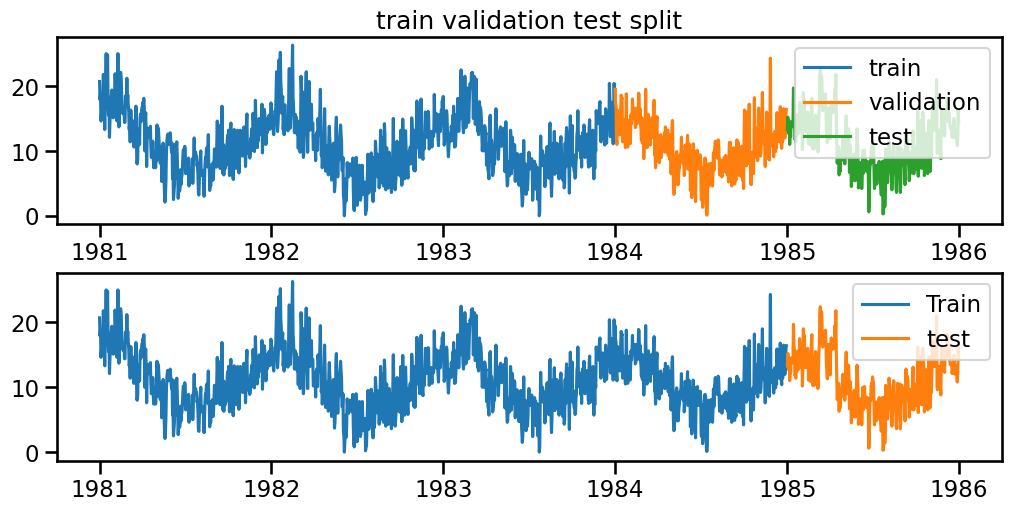

In [44]:
fig, axs = plt.subplots(nrows=2, figsize=(10,5), constrained_layout=True)
axs[0].plot(df_train.index, df_train['Daily minimum temperatures'], label='train')
axs[0].plot(df_validation.index, df_validation['Daily minimum temperatures'], label='validation')
axs[0].plot(df_test.index, df_test['Daily minimum temperatures'], label='test')
axs[0].set_title("train validation test split")
axs[0].legend()

axs[1].plot(df_Train.index, df_Train['Daily minimum temperatures'], label='Train')
axs[1].plot(df_test.index, df_test['Daily minimum temperatures'], label='test')
axs[1].legend()

In [45]:
df_train

component,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1983-12-28,11.1
1983-12-29,16.1
1983-12-30,20.4


In [46]:
df_validation

component,Daily minimum temperatures
Date,
1984-01-01,19.5
1984-01-02,17.1
1984-01-03,17.1
1984-01-04,12.0
1984-01-05,11.0
...,...
1984-12-28,12.6
1984-12-29,16.0
1984-12-30,16.4


In [47]:
df_test

component,Daily minimum temperatures
Date,
1985-01-01,13.3
1985-01-02,15.2
1985-01-03,13.1
1985-01-04,12.7
1985-01-05,14.6
...,...
1985-12-27,11.5
1985-12-28,10.8
1985-12-29,12.0


# 데이터 개수로 나누기

In [24]:
# 1년 52주 
# 6개월 26주 

In [25]:
total_index_num = len(df)
total_index_num

1826

In [6]:
# Train 4년 test data 1년
df_Train, df_test = np.split(df, [len(df)-365])

# train 3년, validation, test 를 각각 1년(365개씩)
df_train, df_validation, df_test = np.split(df, [len(df)-365*2, len(df)-365])

In [7]:
df_train

component,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1983-12-28,11.1
1983-12-29,16.1
1983-12-30,20.4


In [8]:
df_validation

component,Daily minimum temperatures
Date,
1984-01-02,17.1
1984-01-03,17.1
1984-01-04,12.0
1984-01-05,11.0
1984-01-06,16.3
...,...
1984-12-27,12.0
1984-12-28,12.6
1984-12-29,16.0


In [9]:
df_test

component,Daily minimum temperatures
Date,
1985-01-01,13.3
1985-01-02,15.2
1985-01-03,13.1
1985-01-04,12.7
1985-01-05,14.6
...,...
1985-12-27,11.5
1985-12-28,10.8
1985-12-29,12.0


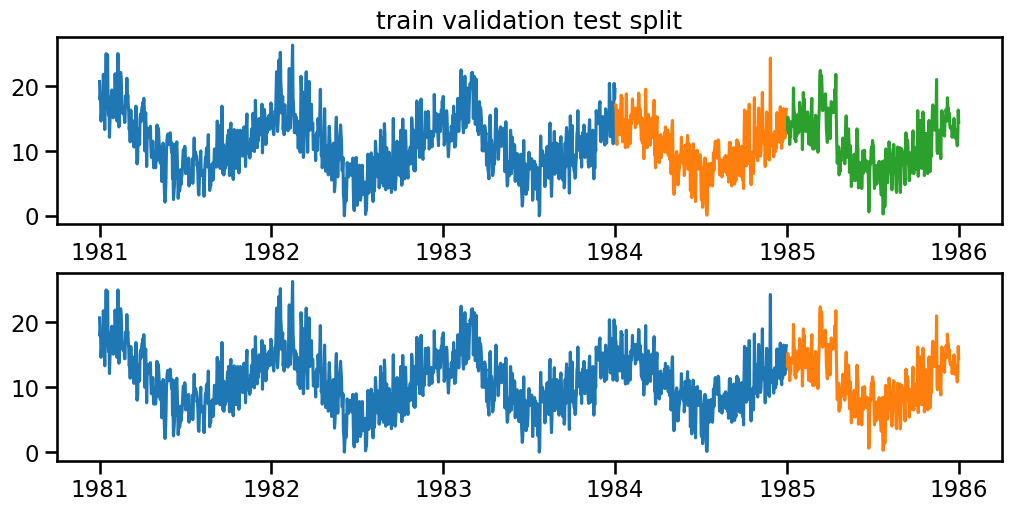

In [30]:
fig, axs = plt.subplots(nrows=2, figsize=(10,5), constrained_layout=True)
axs[0].plot(df_train.index, df_train['Daily minimum temperatures'], label='train')
axs[0].plot(df_validation.index, df_validation['Daily minimum temperatures'], label='validation')
axs[0].plot(df_test.index, df_test['Daily minimum temperatures'], label='test')
axs[0].set_title("train validation test split")
axs[0].legend()

axs[1].plot(df_Train.index, df_Train['Daily minimum temperatures'], label='Train')
axs[1].plot(df_test.index, df_test['Daily minimum temperatures'], label='test')
axs[1].legend()